In [ ]:
# Repository github url : https://github.com/jai-mr/
# Assignment Repository : https://github.com/jai-mr/Assignment-13/S13_2/
# Submitted by : Jaideep Rangnekar
# Registered email id : jaideepmr@gmail.com

## Details of the Assignment
## We have added a very 'smal' Coco sample imageset in the folder called smalcoco. This is to make sure you can run it without issues on Colab.

Full credit goes to this, and if you are looking for much more detailed explainiation and features, please refer to the original source.

You'll need to download the weights from the original source.

1. Create a folder called weights in the root (YoloV3) folder
2. Download from: https://drive.google.com/open?id=1LezFG5g3BCW6iYaV89B2i64cqEUZD7e0
3. Place 'yolov3-spp-ultralytics.pt' file in the weights folder:
* to save time, move the file from the above link to your GDrive
* then drag and drop from your GDrive opened in Colab to weights folder
4. run this command
* python train.py --data data/smalcoco/smalcoco.data --batch 10 --cache --epochs 25 --nosave

For custom dataset:

1. Clone this repo: https://github.com/miki998/YoloV3_Annotation_Tool
2. Follow the installation steps as mentioned in the repo.
3. For the assignment, download 500 images of your unique object.
4. Annotate the images using the Annotation tool.
 
 data

  --customdata

    --images/
        --img001.jpg
        --img002.jpg

    --labels/

        --img001.txt

        --img002.txt
    custom.data #data file

    custom.names #your class names

    custom.txt #list of name of the images you want your network to be trained on. Currently we are using same file for test/train


5. As you can see above you need to create custom.data file. For 1 class example, your file will look like this:
  * classes=1
  * train=data/customdata/custom.txt
  * test=data/customdata/custom.txt 
  * names=data/customdata/custom.names
As6.  you it a poor idea to keep test and train data same, but the point of this repo is to get you up and running with YoloV3 asap. You'll probably do a mistake in writing to custom.txt file. This is how our file looks like (please note the .s and /s):
* ./data/customdata/images/img001.jpg
* ./data/customdata/images/img002.jpg
* ./data/customdata/images/img003.jpg
...
7. You need to add custom.names file as you can see above. For our example, we downloaded images of Walle. Our custom.names file look like this:
### walle
8.Walle above will have a class index of 0.
9. For COCO's 80 classes, VOLOv3's output vector has 255 dimensions ( (4+1+80)*3). Now we have 1 class, so we would need to change it's architecture.
10. Copy the contents of 'yolov3-spp.cfg' file to a new file called 'yolov3-custom.cfg' file in the data/cfg folder.
11. Search for 'filters=255' (you should get entries entries). Change 255 to 18 = (4+1+1)*3
12. Search for 'classes=80' and change all three entries to 'classes=1'
13. Since you are lazy (probably), you'll be working with very few samples. In such a case it is a good idea to change:
* burn_in to 100
* max_batches to 5000
* steps to 4000,4500
14. Don't forget to perform the weight file steps mentioned in the sectio above.
15. Run this command
*  python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 3 --nosave

As you can see in the collage image above, a lot is going on, and if you are creating a set of say 500 images, you'd get a bonanza of images via default augmentations being performed.

Results After training for 300 Epochs, results look awesome!

In [ ]:
!git clone https://github.com/theschoolofai/YoloV3.git

Cloning into 'YoloV3'...
remote: Enumerating objects: 156, done.
remote: Total 156 (delta 0), reused 0 (delta 0), pack-reused 156
Receiving objects: 100% (156/156), 12.74 MiB | 43.50 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [ ]:
# Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
from google.colab import drive
drive.mount("/content/gdrive")
gdrivepath="/content/gdrive/My Drive/Colab Notebooks/S13/S13_2"

Mounted at /content/gdrive


In [ ]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.6.0+cu101 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15079MB, multi_processor_count=40)


In [ ]:
import os 
os.chdir(gdrivepath)
!pwd
!ls

/content/gdrive/My Drive/Colab Notebooks/S13/S13_2
13_2_CodeFinal_Yolo3.ipynb	     output_jaideepimages  train_org.py
13_2_CodeFinal_Yolo3_MyImages.ipynb  __pycache__	   train.py
cfg				     results.png	   utils
data				     results.txt	   weights
detect.py			     runs		   YoloV3
models.py			     saved_checkpoints
out_out1			     test.py


In [ ]:
!pwd
!ls data/customdata/

/content/gdrive/My Drive/Colab Notebooks/S13/S13_2
custom.data	      custom.names  labels	 test.txt
customeshapes.shapes  images	    test.shapes  train.txt


In [ ]:
# Run train.py to train YOLOv3
!ls data

13_2_CodeFinal_Yolo3.ipynb	     detect.py	__pycache__  train.py
13_2_CodeFinal_Yolo3_MyImages.ipynb  models.py	results.png  utils
cfg				     out_out	runs	     weights
data				     output	test.py      YoloV3


In [ ]:
!python train.py --data data/smalcoco/smalcoco.data --batch 3 --cache --epochs 3 --nosave

Namespace(accumulate=4, adam=False, batch_size=3, bucket='', cache_images=True, cfg='cfg/yolov3-spp.cfg', data='data/smalcoco/smalcoco.data', device='', epochs=3, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

2020-10-23 08:23:55.665340: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:11<00:00,  1.80it/s]
FILE: ./data/smalcoco/labels/train2014/COCO_train2014_000000000113.txt
Caching images (0.0GB): 100% 20/20 [00:09<00:00,  2.14it/s]
Caching labels (20 found, 0 missing, 0 empt

In [ ]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 3 --nosave

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=3, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

2020-10-23 11:40:46.310998: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
Caching labels (2859 found, 130 missing, 38 empty, 0 duplicate, for 3027 images): 100% 3027/3027 [00:02<00:00, 1163.26it/s]
FILE: data/customdata/labels/SImage_99.txt
Caching images (1.7GB): 100% 3027/3027 [00:24<00:00, 121.68it/s]
SP: data/customdata/test.shapes
Reading image sha

In [ ]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 300 --nosave

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=300, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

2020-10-23 12:00:48.528446: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
Caching labels (2859 found, 130 missing, 38 empty, 0 duplicate, for 3027 images): 100% 3027/3027 [00:02<00:00, 1130.71it/s]
FILE: data/customdata/labels/SImage_99.txt
Caching images (1.7GB): 100% 3027/3027 [00:24<00:00, 121.34it/s]
SP: data/customdata/test.shapes
Caching labels 

In [ ]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 100 

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=100, evolve=False, img_size=[512], multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

2020-10-24 03:37:46.962586: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
Caching labels (2859 found, 130 missing, 38 empty, 0 duplicate, for 3027 images): 100% 3027/3027 [09:05<00:00,  5.55it/s]
FILE: data/customdata/labels/SImage_99.txt
Caching images (1.7GB): 100% 3027/3027 [12:27<00:00,  4.05it/s]
SP: data/customdata/test.shapes
Caching labels (2

In [ ]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 300 --weights='weights/best.pt'

In [ ]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 300 --weights='weights/best.pt'

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=300, evolve=False, img_size=[512], multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='weights/best.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

2020-10-24 17:31:26.737113: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
Caching labels (2859 found, 130 missing, 38 empty, 0 duplicate, for 3027 images): 100% 3027/3027 [00:02<00:00, 1075.17it/s]
FILE: data/customdata/labels/SImage_99.txt
Caching images (1.7GB): 100% 3027/3027 [00:27<00:00, 108.14it/s]
SP: data/customdata/test.shapes
Caching labels (296 found, 14 mi

In [ ]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 300 --weights='weights/best.pt'

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=300, evolve=False, img_size=[512], multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='weights/best.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

2020-10-25 03:43:26.544467: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
Caching labels (2859 found, 130 missing, 38 empty, 0 duplicate, for 3027 images): 100% 3027/3027 [13:28<00:00,  3.74it/s]
FILE: data/customdata/labels/SImage_99.txt
Caching images (1.7GB): 100% 3027/3027 [15:15<00:00,  3.31it/s]
SP: data/customdata/test.shapes
Caching labels (296 found, 14 missi

In [ ]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 300 --weights='weights/best.pt'

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=300, evolve=False, img_size=[512], multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='weights/best.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

2020-10-25 05:34:38.554971: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
Caching labels (2859 found, 130 missing, 38 empty, 0 duplicate, for 3027 images): 100% 3027/3027 [10:47<00:00,  4.68it/s]
FILE: data/customdata/labels/SImage_99.txt
Caching images (1.7GB): 100% 3027/3027 [12:12<00:00,  4.14it/s]
SP: data/customdata/test.shapes
Caching labels (296 found, 14 missi

In [ ]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 300 --weights='weights/best.pt'

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=300, evolve=False, img_size=[512], multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='weights/best.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

2020-10-25 19:34:42.617584: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
Caching labels (2859 found, 130 missing, 38 empty, 0 duplicate, for 3027 images): 100% 3027/3027 [12:26<00:00,  4.05it/s]
FILE: data/customdata/labels/SImage_99.txt
Caching images (1.7GB): 100% 3027/3027 [13:28<00:00,  3.74it/s]
SP: data/customdata/test.shapes
Caching labels (296 found, 14 missi

In [ ]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 300 --weights='weights/best.pt'

In [ ]:
!python3 test.py --data data/customdata/custom.data --save-json --img-size 416  # 0.565 mAP

In [ ]:
!python detect.py --conf-thres 0.1 --output out_out

In [ ]:
!python detect.py --conf-thres 0.1 --img-size 320 --output out_out1 --source 'data/samples'

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=320, iou_thres=0.6, names='data/customdata/custom.names', output='out_out1', save_txt=False, source='data/samples', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
image 1/15 data/samples/35.jpg: 320x256 1 hardhats, 2 vests, 1 masks, 1 bootss, Done. (0.024s)
image 2/15 data/samples/36c731298a.jpg: 320x256 1 hardhats, 1 vests, 1 masks, 2 bootss, Done. (0.024s)
image 3/15 data/samples/71.jpg: 320x256 1 hardhats, 1 masks, 1 bootss, Done. (0.024s)
image 4/15 data/samples/8c7db8ca.jpg: 256x320 4 hardhats, 3 vests, 3 masks, Done. (0.023s)
image 5/15 data/samples/8c7db8cc.jpg: 256x320 4 hardhats, 2 vests, 3 masks, Done. (0.023s)
image 6/15 data/samples/8c7ddfed.jpg: 192x320 4 hardhats, 3 vests, 5 m

In [ ]:
!python detect.py --conf-thres 0.1 --img-size 320 --output out_out2 --source 'data/customdata/samples'

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=320, iou_thres=0.6, names='data/customdata/custom.names', output='out_out2', save_txt=False, source='data/customdata/samples', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
image 1/500 data/customdata/samples/image-0001.png: 192x320 3 hardhats, 2 vests, 2 bootss, Done. (0.013s)
image 2/500 data/customdata/samples/image-0002.png: 192x320 3 hardhats, 2 vests, 2 bootss, Done. (0.013s)
image 3/500 data/customdata/samples/image-0003.png: 192x320 3 hardhats, 1 vests, 2 bootss, Done. (0.014s)
image 4/500 data/customdata/samples/image-0004.png: 192x320 3 hardhats, 2 vests, 2 bootss, Done. (0.013s)
image 5/500 data/customdata/samples/image-0005.png: 192x320 3 hardhats, 2 vests, 2 bootss

In [ ]:
!pwd

/content/gdrive/My Drive/Colab Notebooks/S13/S13_2


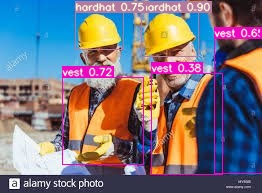

In [ ]:
Image(filename='out_out1/bb70afca8a.jpg', width=600)

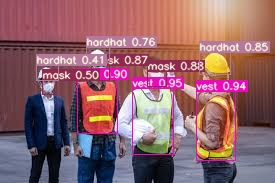

In [ ]:
Image(filename='out_out1/A_18.jpg', width=600)

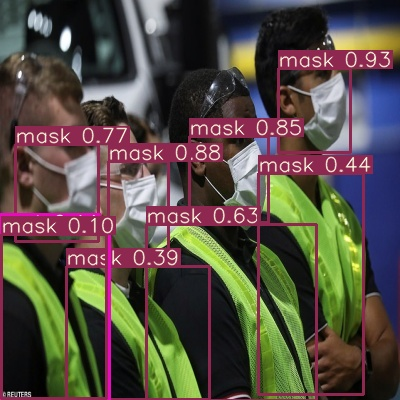

In [ ]:
Image(filename='out_out1/Aimg_060.jpg', width=600)

In [ ]:
!pwd

/content/gdrive/My Drive/Colab Notebooks/S13/S13_2


In [ ]:
!cd data/customdata/samples

In [ ]:
!ls data/customdata/samples |wc -l
!pwd
!ls /content/gdrive/'My Drive'/'Colab Notebooks'/S13/S13_2/data/customdata/samples

2
/content/gdrive/My Drive/Colab Notebooks/S13/S13_2
ffmpeg.exe  vdo-2-workfromhome.mp4


In [ ]:
!pwd
!cd /content/
!mkdir /content/data
!mkdir /content/data/samples
!cp  /content/gdrive/'My Drive'/'Colab Notebooks'/S13/S13_2/data/customdata/samples/*.*  /content/data/samples


/content/gdrive/My Drive/Colab Notebooks/S13/S13_2
mkdir: cannot create directory ‘/content/data’: File exists
mkdir: cannot create directory ‘/content/data/samples’: File exists
ffmpeg.exe  vdo-2-workfromhome.mp4


In [ ]:
!pwd
!ls  /content/data/samples

/content
ffmpeg.exe  vdo-2-workfromhome.mp4


In [ ]:
!cd  /content/data/samples
!ls

13_2_CodeFinal_Yolo3.ipynb	     output_jaideepimages  train_batch0.png
13_2_CodeFinal_Yolo3_MyImages.ipynb  __pycache__	   train.py
cfg				     results.png	   utils
data				     results.txt	   weights
detect.py			     runs		   YoloV3
models.py			     test_batch0.png
out_out1			     test.py


In [ ]:
!ls data/customdata/samples |wc -l

ls: cannot access 'data/customdata/samples': No such file or directory
0


In [ ]:
# Unit Tests
!python3 detect.py  # detect 2 persons, 1 tie
!python3 test.py --data data/coco_32img.data  # test mAP = 0.8
!python3 train.py --data data/coco_32img.data --epochs 3 --nosave  # train 3 epochs

In [ ]:
!python3 detect.py 

In [ ]:
!python detect.py --cfg cfg/yolov3-custom.cfg --conf-thres 0.1 --output out_out

In [ ]:
# Run inference with your trained model by copying an image to data/samples folder and running below
!python3 detect.py  --weights weights/last.pt 

In [ ]:
Run inference with your trained model by copying an image to data/samples folder and running
python3 detect.py --weights weights/last.pt

In [ ]:
!ls data

In [ ]:
Image(filename='out_out/img001.jpg', width=600)

In [ ]:
Image(filename='out_out/img003.jpg', width=600)

In [ ]:
Image(filename='out_out/img020.jpg', width=600)